In [1]:
library(dagitty)
library(lavaan)

library(xtable)

Warning message:
"package 'dagitty' was built under R version 3.6.3"Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-8
lavaan is FREE software! Please report any bugs.


In [2]:
data <- read.csv('Data//data.csv')
head(data)

X39,State.gov,X77516,Bachelors,X13,Never.married,Adm.clerical,Not.in.family,White,Male,X2174,X0,X40,United.States,X..50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [3]:
data <- read.csv('Data//clean_data.csv')
head(data)

Age,Education,MaritalStatus,Race,Sex,HoursPerWeek,Immigrant,Income
35-49,Academic-Degree,Never-married,White,Male,40,no,<=50K
50-65,Academic-Degree,Is-Married,White,Male,<20,no,<=50K
35-49,HS-grad,Was-Married,White,Male,40,no,<=50K
50-65,Non-HS-Grad,Is-Married,Non-White,Male,40,no,<=50K
20-34,Academic-Degree,Is-Married,Non-White,Female,40,yes,<=50K
35-49,Academic-Degree,Is-Married,White,Female,40,no,<=50K


In [4]:
data$Age <- ordered(data$Age,
                    levels = c('<20', '20-34', '35-49', '50-65', '>65'))
data$Education <- ordered(data$Education,
                          levels = c('Non-HS-Grad', 'HS-grad', 'College-Associate', 'Academic-Degree'))
data$HoursPerWeek <- ordered(data$HoursPerWeek,
                             levels = c('<20', '20-39', '40', '>40'))
data$Income <- ordered(data$Income,
                       levels = c('<=50K', '>50K'))
data$Race <- as.integer(data$Race)
data$Sex <- as.integer(data$Sex)
data$Immigrant <- as.integer(data$Immigrant)
levels(data$MaritalStatus) <- list(Married = 'Is-Married',
                                   NotMarried = c('Was-Married', 'Never-married'))
data$MaritalStatus <- as.integer(data$MaritalStatus)

head(data)

Age,Education,MaritalStatus,Race,Sex,HoursPerWeek,Immigrant,Income
35-49,Academic-Degree,2,2,2,40,1,<=50K
50-65,Academic-Degree,1,2,2,<20,1,<=50K
35-49,HS-grad,2,2,2,40,1,<=50K
50-65,Non-HS-Grad,1,1,2,40,1,<=50K
20-34,Academic-Degree,1,1,1,40,2,<=50K
35-49,Academic-Degree,1,2,1,40,1,<=50K


In [5]:
corr <- lavCor(data)
corr

,Age,Education,MaritalStatus,Race,Sex,HoursPerWeek,Immigrant,Income
Age,1.00000000,0.084321379,-0.31736534,0.02356824,0.086984738,0.14034588,-0.013766498,0.35164879
Education,0.08432138,1.000000000,-0.07467899,0.05443497,0.001153065,0.19738384,-0.088518287,0.46504760
MaritalStatus,-0.31736534,-0.074678991,1.00000000,-0.09707553,-0.426348288,-0.25981461,-0.030453015,-0.55990128
Race,0.02356824,0.054434972,-0.09707553,1.00000000,0.105148399,0.08816635,-0.192114623,0.12741911
Sex,0.08698474,0.001153065,-0.42634829,0.10514840,1.000000000,0.27904865,0.003005682,0.32034302
HoursPerWeek,0.14034588,0.197383839,-0.25981461,0.08816635,0.279048646,1.00000000,-0.028055483,0.39574713
Immigrant,-0.01376650,-0.088518287,-0.03045302,-0.19211462,0.003005682,-0.02805548,1.000000000,-0.05828284
Income,0.35164879,0.465047602,-0.55990128,0.12741911,0.320343017,0.39574713,-0.058282845,1.00000000


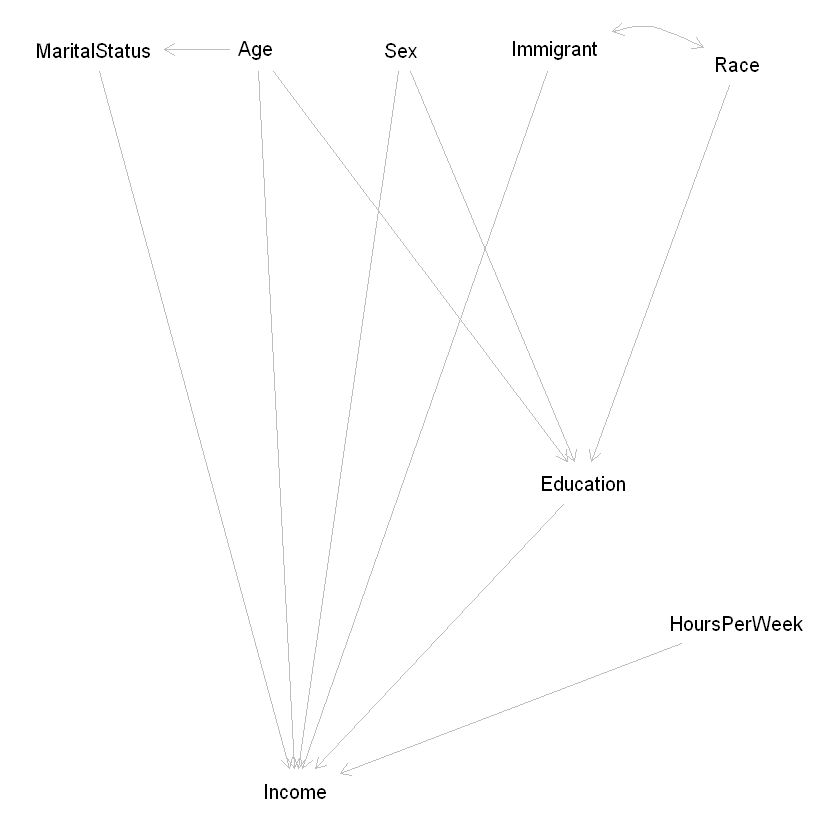

In [6]:
model <- dagitty('dag {bb = "-4.6, -3.8, 3.7, 3.7"
                       Age [pos = "-2, -2.6"]
                       Education [pos = "1.4, 0.5"]
                       HoursPerWeek [pos = "3, 1.5"]
                       Immigrant [pos = "1.1, -2.6"]
                       Income [pos = "-1.6, 2.7"]
                       MaritalStatus [pos = "-3.7, -2.6"]
                       Race [pos = "3.0, -2.5"]
                       Sex [pos = "-0.5, -2.6"]
                       Age -> {Education Income MaritalStatus}
                       Immigrant -> Income
                       Immigrant <-> Race
                       Education -> Income
                       HoursPerWeek -> Income
                       MaritalStatus -> Income
                       Race -> Education
                       Sex -> {Education Income}
                       }')

plot(model)

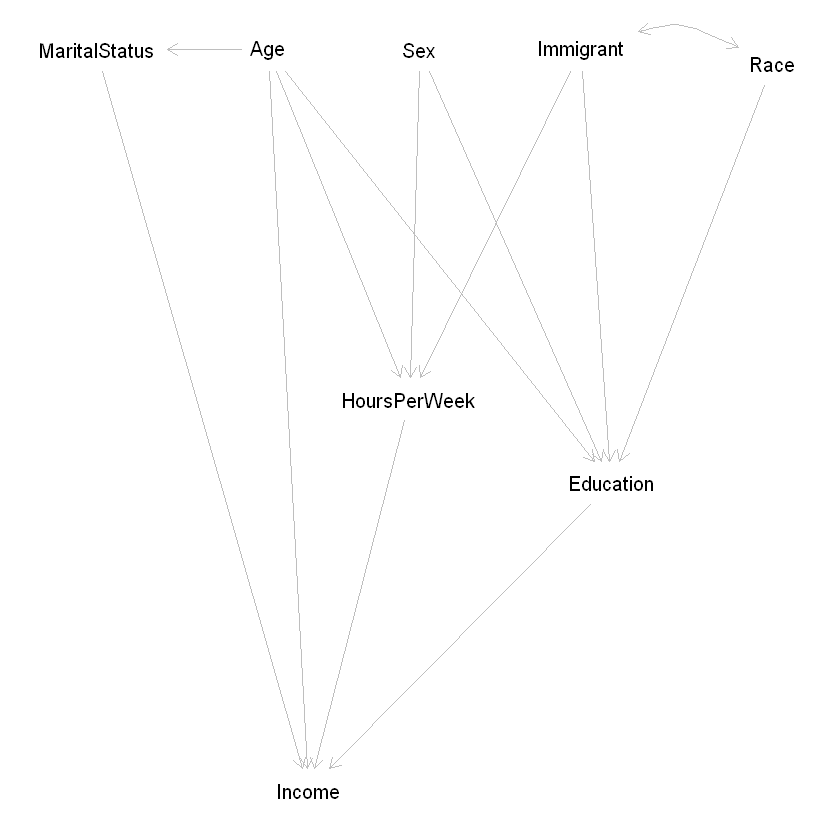

In [7]:
model2 <- dagitty('dag {bb = "-4.6, -3.8, 3.7, 3.7"
                        Age [pos = "-2, -2.6"]
                        Education [pos = "1.4, 0.5"]
                        HoursPerWeek [pos = "-0.6, -0.1"]
                        Immigrant [pos = "1.1, -2.6"]
                        Income [pos = "-1.6, 2.7"]
                        MaritalStatus [pos = "-3.7, -2.6"]
                        Race [pos = "3.0, -2.5"]
                        Sex [pos = "-0.5, -2.6"]
                        Age -> {Education HoursPerWeek Income MaritalStatus}
                        Education -> Income
                        Immigrant -> {Education HoursPerWeek}
                        Immigrant <-> Race
                        HoursPerWeek -> Income
                        MaritalStatus -> Income
                        Race -> Education
                        Sex -> {Education HoursPerWeek}
                        }' )

plot(model2)

In [8]:
localTests(model,
           sample.cov = corr,
           sample.nobs = nrow(data))

,estimate,p.value,2.5%,97.5%
Age _||_ HrPW,0.140345881,6.269761e-133,0.129267531,0.151396949
Age _||_ Immg,-0.013766498,1.680764e-02,-0.025048117,-0.002481374
Age _||_ Race,0.023568238,4.245434e-05,0.012285996,0.034844484
Age _||_ Sex,0.086984738,8.257393e-52,0.075773780,0.098174484
Edct _||_ HrPW,0.197383839,2.398037e-264,0.186529032,0.208232033
Edct _||_ Immg | Race,-0.079660317,1.058015e-43,-0.090864739,-0.068436246
Edct _||_ MrtS | Age,-0.050711171,1.206584e-18,-0.061961468,-0.039448057
HrPW _||_ Immg,-0.028055483,1.096430e-06,-0.039328547,-0.016775285
HrPW _||_ MrtS,-0.259814609,0.000000e+00,-0.270406271,-0.249325527
HrPW _||_ Race,0.088166348,3.480544e-53,0.076957592,0.099353649


In [9]:
print(xtable(localTests(model,
                        sample.cov = corr,
                        sample.nobs = nrow(data)),
             type = "latex"),
      file = "r1m1.tex")

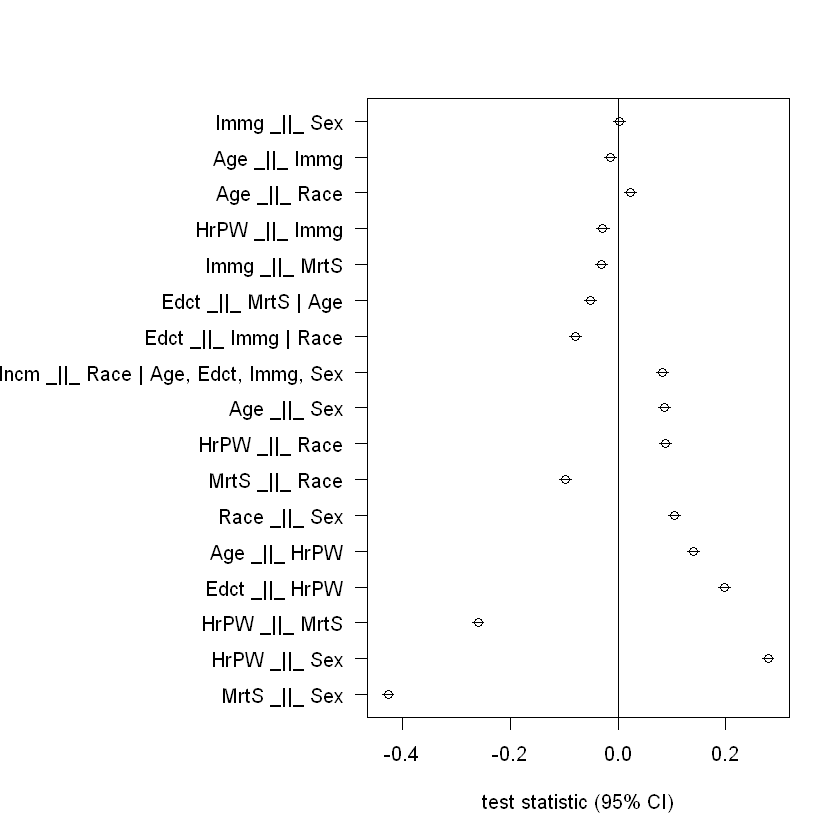

In [10]:
plotLocalTestResults(localTests(model,
                                sample.cov = corr,
                                sample.nobs = nrow(data)))

In [11]:
localTests(x = model,
           sample.cov = corr,
           sample.nobs = nrow(data),
           max.conditioning.variables = 2)

,estimate,p.value,2.5%,97.5%
Age _||_ HrPW,0.140345881,6.269761e-133,0.129267531,0.151396949
Age _||_ Immg,-0.013766498,1.680764e-02,-0.025048117,-0.002481374
Age _||_ Race,0.023568238,4.245434e-05,0.012285996,0.034844484
Age _||_ Sex,0.086984738,8.257393e-52,0.075773780,0.098174484
Edct _||_ HrPW,0.197383839,2.398037e-264,0.186529032,0.208232033
Edct _||_ Immg | Race,-0.079660317,1.058015e-43,-0.090864739,-0.068436246
Edct _||_ MrtS | Age,-0.050711171,1.206584e-18,-0.061961468,-0.039448057
HrPW _||_ Immg,-0.028055483,1.096430e-06,-0.039328547,-0.016775285
HrPW _||_ MrtS,-0.259814609,0.000000e+00,-0.270406271,-0.249325527
HrPW _||_ Race,0.088166348,3.480544e-53,0.076957592,0.099353649


In [12]:
print(xtable(localTests(model,
                        sample.cov = corr,
                        sample.nobs = nrow(data),
                        max.conditioning.variables = 2),
             type = "latex"),
      file = "r2m1.tex")

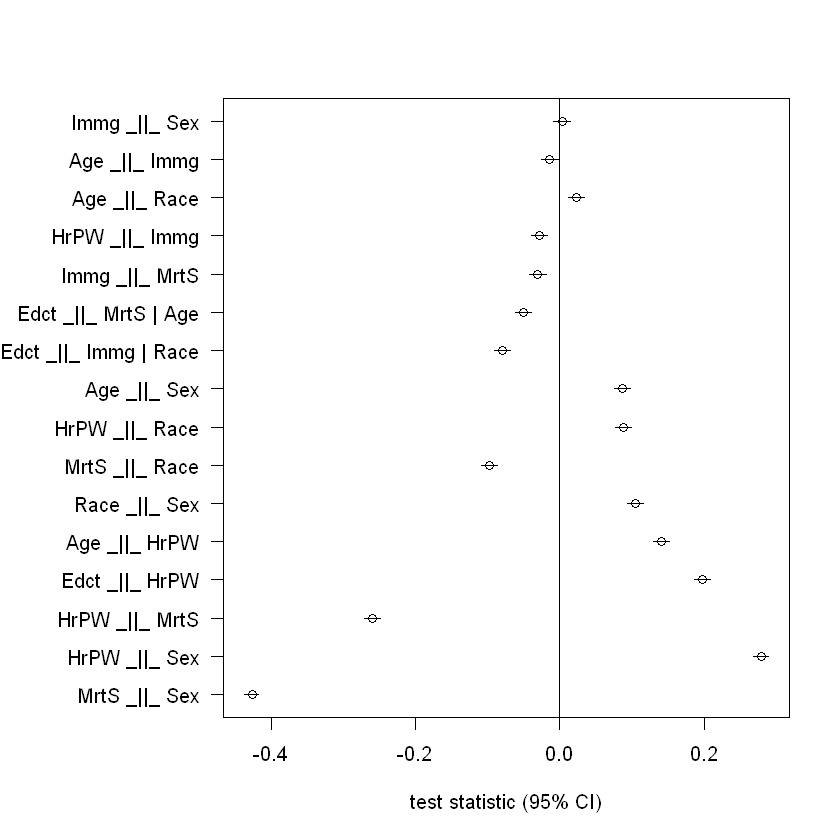

In [13]:
plotLocalTestResults(localTests(model,
                                sample.cov = corr,
                                sample.nobs = nrow(data),
                                max.conditioning.variables = 2))

In [14]:
localTests(model2,
           sample.cov = corr,
           sample.nobs = nrow(data))

,estimate,p.value,2.5%,97.5%
Age _||_ Immg,-0.013766498,1.680764e-02,-0.025048117,-0.002481374
Age _||_ Race,0.023568238,4.245434e-05,0.012285996,0.034844484
Age _||_ Sex,0.086984738,8.257393e-52,0.075773780,0.098174484
"Edct _||_ HrPW | Age, Immg, Sex",0.195438303,4.833065e-259,0.184573763,0.206294661
Edct _||_ MrtS | Age,-0.050711171,1.206584e-18,-0.061961468,-0.039448057
HrPW _||_ MrtS | Age,-0.229278589,0.000000e+00,-0.239997517,-0.218592229
HrPW _||_ Race | Immg,0.084380882,7.631673e-49,0.073164999,0.095576096
"Immg _||_ Incm | Age, Edct, HrPW",-0.015910400,5.724627e-03,-0.027191590,-0.004625160
Immg _||_ MrtS,-0.030453015,1.221746e-07,-0.041724194,-0.019174096
Immg _||_ Sex,0.003005682,6.016852e-01,-0.008280109,0.014290707


In [15]:
print(xtable(localTests(model2,
                        sample.cov = corr,
                        sample.nobs = nrow(data)),
             type = "latex"),
      file = "r1m2.tex")

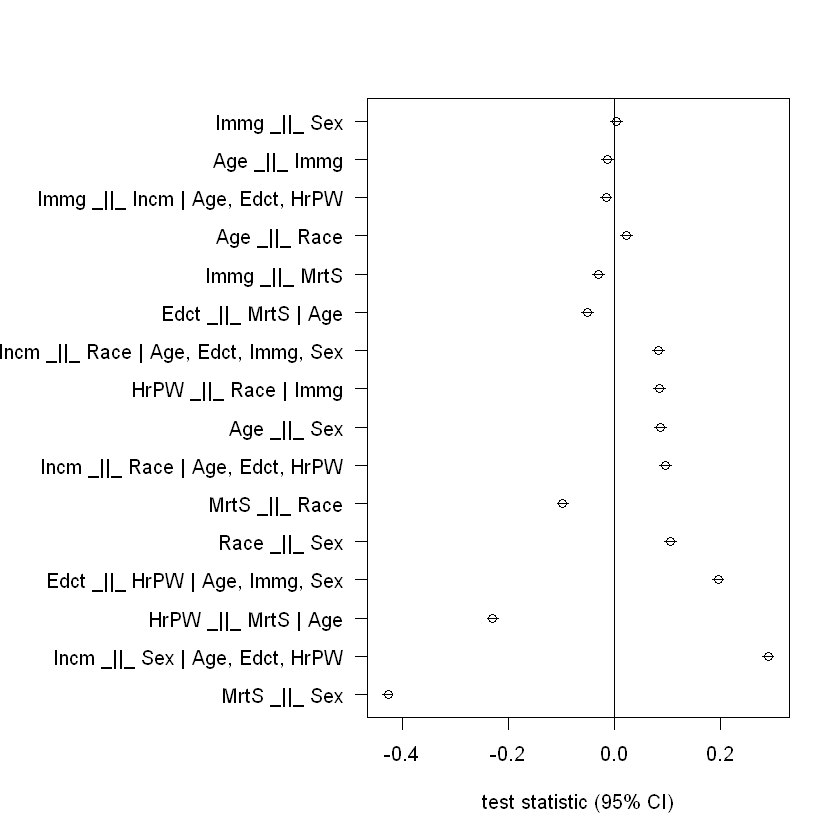

In [16]:
plotLocalTestResults(localTests(model2,
                                sample.cov = corr,
                                sample.nobs = nrow(data)))

In [17]:
localTests(x = model2,
           sample.cov = corr,
           sample.nobs = nrow(data),
           max.conditioning.variables = 2)

,estimate,p.value,2.5%,97.5%
Age _||_ Immg,-0.013766498,1.680764e-02,-0.025048117,-0.002481374
Age _||_ Race,0.023568238,4.245434e-05,0.012285996,0.034844484
Age _||_ Sex,0.086984738,8.257393e-52,0.075773780,0.098174484
Edct _||_ MrtS | Age,-0.050711171,1.206584e-18,-0.061961468,-0.039448057
HrPW _||_ MrtS | Age,-0.229278589,0.000000e+00,-0.239997517,-0.218592229
HrPW _||_ Race | Immg,0.084380882,7.631673e-49,0.073164999,0.095576096
Immg _||_ MrtS,-0.030453015,1.221746e-07,-0.041724194,-0.019174096
Immg _||_ Sex,0.003005682,6.016852e-01,-0.008280109,0.014290707
MrtS _||_ Race,-0.097075533,3.687141e-64,-0.108243453,-0.085884426
MrtS _||_ Sex,-0.426348288,0.000000e+00,-0.436663708,-0.417969404


In [18]:
print(xtable(localTests(model2,
                        sample.cov = corr,
                        sample.nobs = nrow(data),
                        max.conditioning.variables = 2),
             type = "latex"),
      file = "r2m2.tex")

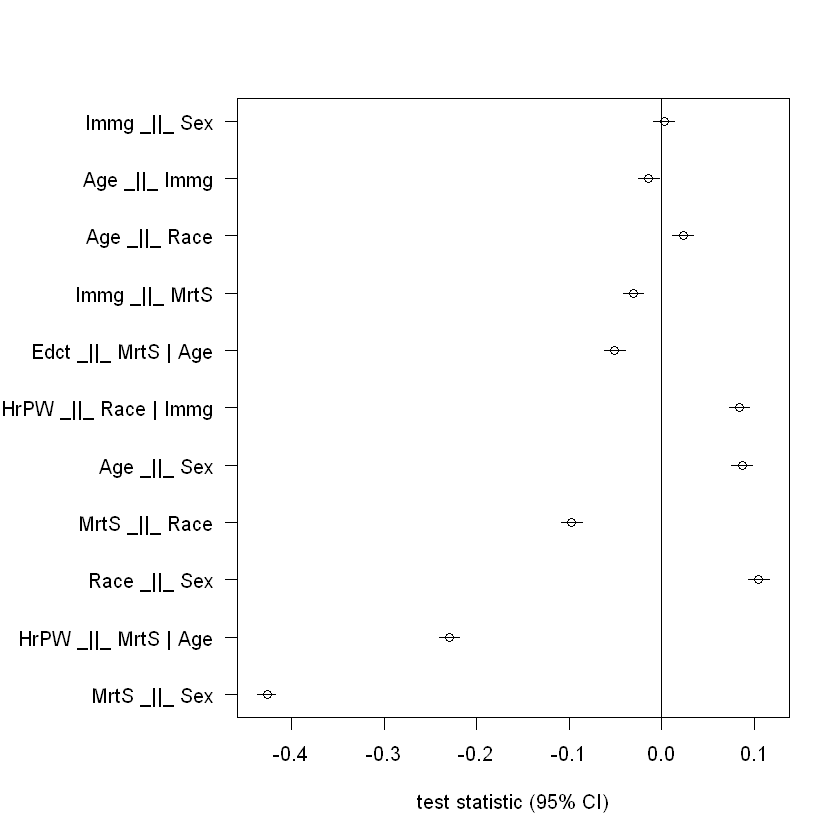

In [19]:
plotLocalTestResults(localTests(model2,
                                sample.cov = corr,
                                sample.nobs = nrow(data),
                                max.conditioning.variables = 2))